In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import re
import nltk
from nltk.corpus import stopwords
import pymorphy2
from IPython.display import Image

In [159]:
#!pip install 

In [160]:
import sys

In [161]:
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

### Загрузка и первичный анализ данных

Используем данные с сайта Book24

In [162]:
data = pd.read_csv('data/datanorepeat.csv')

In [163]:
data.shape

(12082, 10)

In [164]:
data.dtypes

name            object
author          object
section         object
publish         object
age             object
year           float64
pages          float64
rating          object
cove            object
description     object
dtype: object

In [165]:
data.isnull().sum()

name              1
author         1382
section           0
publish        1496
age             321
year            196
pages           278
rating            0
cove              0
description      22
dtype: int64

In [166]:
test= data.author.fillna(0)


In [89]:
test[11000:11100]

11000    Доценко Виктор Николаевич
11001         Герберт Джордж Уэллс
11002            Виктория Токарева
11003                    Жорж Санд
11004                            0
                   ...            
11095                Михаил Михеев
11096                   Влад Савин
11097              Кристофер Прист
11098                   Юрий Буйда
11099             Виктория Платова
Name: author, Length: 100, dtype: object

Удалим "ненужные" книги

In [90]:
data7 = data
data7.shape

(12082, 10)

In [91]:
data7 = data7.dropna()

In [92]:
data7.isnull().sum()

name           0
author         0
section        0
publish        0
age            0
year           0
pages          0
rating         0
cove           0
description    0
dtype: int64

In [93]:
data7.shape

(9792, 10)

In [94]:
data = data7

In [95]:
list = data['section'].unique()
delete = []
for i in range(data['section'].unique().shape[0]):
    if data[(data.section == list[i])].shape[0] < 5:
        delete.append(list[i])
list = ['NaN', 'Книги на английском языке', 'Артбуки', 'Восточная философия', 'Книги на других языках', 
        'Биографии. Мемуары', 'Книги на немецком языке', 'Пословицы и поговорки', 'Деятели культуры и искусства',
        'Книги на французском языке', 'Проза', 'Зарубежный юмор', 'Поэзия', 'Стимпанк', 'Манга', 'Классическая поэзия', 
        'Популярная психология', 'Комиксы', 'Современная поэзия', 'Афоризмы']
for i in range(len(list)):
    delete.append(list[i])

In [96]:
len(delete)

63

In [97]:
for i in range(len(delete)):
    list = data[(data.section == delete[i])].index
    data = data.drop(index=list)
data.shape

(9070, 10)

In [98]:
data['section'].unique().shape[0]

68

In [99]:
data['section'].unique()

array(['Новеллизации', 'Современные любовные романы',
       'Социальная фантастика', 'Зарубежные детективы', 'Антиутопия',
       'Русское фэнтези', 'Классическая зарубежная литература',
       'Любовное фэнтези', 'Зарубежное фэнтези',
       'Современная зарубежная проза', 'Русская сентиментальная проза',
       'Героическое фэнтези', 'Современная русская проза', 'Триллеры',
       'Книги про вампиров', 'Историческая проза',
       'Классическая русская литература', 'Героическая фантастика',
       'Зарубежные любовные романы', 'Научная фантастика',
       'Зарубежная сентиментальная проза',
       'Фантастика и фэнтези для подростков',
       'Остросюжетные любовные романы', 'Ужасы. Мистика', 'Киберпанк',
       'Классические детективы', 'Зарубежная фантастика',
       'Боевая фантастика', 'Городское фэнтези', 'Юмористическое фэнтези',
       'Комиксы для детей', 'Постапокалипсис', 'Темное фэнтези',
       'Космическая фантастика', 'Графические романы',
       'Интеллектуальная проз

In [100]:
data.head()

,name,author,section,publish,age,year,pages,rating,cove,description
0,Благословение небожителей. Том 2,Тунсю Мосян,Новеллизации,Эксмо,18+,2022.0,432.0,5,https://ndc.book24.ru/resize/410x590/iblock/a5...,"Всё в этом мире имеет счёт: и удача, и невезен..."
1,Благословение небожителей. Том 1,Тунсю Мосян,Новеллизации,Эксмо,16+,2022.0,416.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/ac...,В незапамятные времена Се Лянь был наследным п...
2,Лето в пионерском галстуке,Сильванова Катерина,Современные любовные романы,Popcorn Books,18+,2021.0,544.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/25...,Юра возвращается в пионерский лагерь своей юно...
3,Электрошок. Внезапно,Сергей Тармашев,Социальная фантастика,АСТ,16+,2022.0,352.0,5,https:https://cdn.book24.ru/v2/ASE000000000863...,Новая книга от автора культовых циклов «Древни...
4,Билли Саммерс,Стивен Кинг,Зарубежные детективы,АСТ,16+,2022.0,544.0,"4,4",https://ndc.book24.ru/resize/410x590/iblock/a2...,Новый увлекательный роман от автора культовых ...


In [101]:
data.shape

(9070, 10)

In [102]:
data.iloc[42]

name                                        Чудовище и чудовища 
author                                          Барбара Морриган
section                                       Зарубежное фэнтези
publish                                                    Эксмо
age                                                         18+ 
year                                                      2020.0
pages                                                      448.0
rating                                                      4,4 
cove           https:https://cdn.book24.ru/v2/ITD000000001045...
description    Такута — патологоанатом. Неплохая профессия дл...
Name: 43, dtype: object

In [103]:
data.shape

(9070, 10)

In [104]:
#data.to_csv(r'C:\Users\kenia\Thesis\data\dataclean.csv', index=False)

### Гистограммы по признакам

In [167]:
data = pd.read_csv('data/dataclean.csv')

<AxesSubplot:>

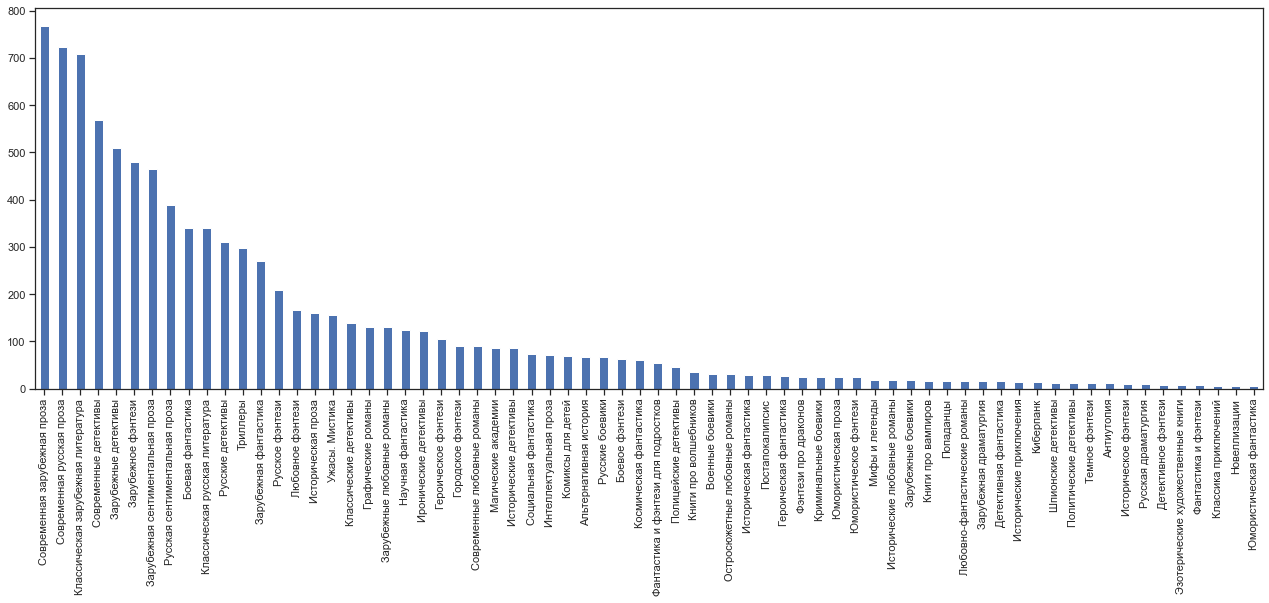

In [168]:
# Genre distribution
data['section'].value_counts().plot(x ='count', y = 'section', kind = 'bar', figsize = (22,7))

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

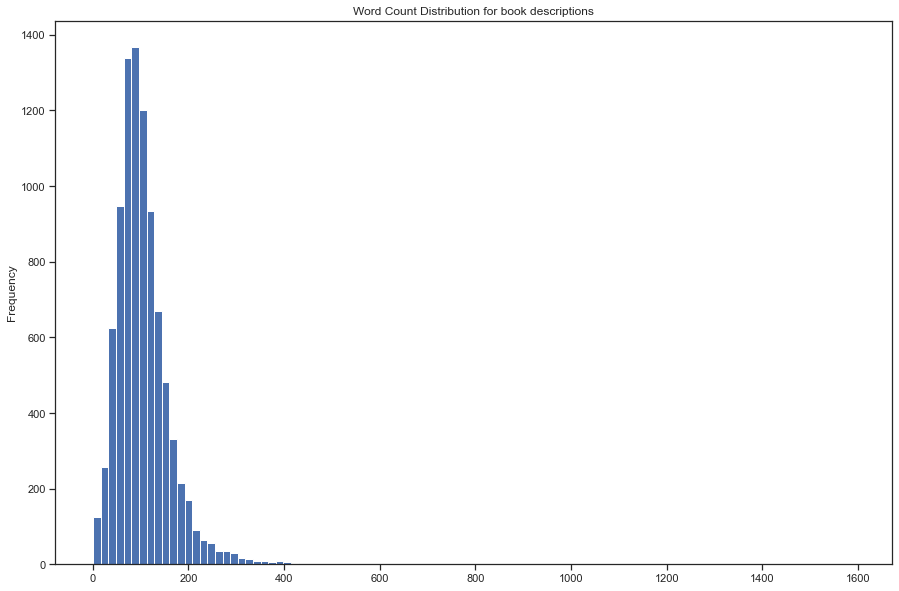

In [169]:
# анализ размера описаний
data['word_count'] = data['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
data['word_count'].plot(
    kind='hist',
    bins = 100,
    figsize = (15,10),title='Word Count Distribution for book descriptions')

In [170]:
data.shape

(9070, 11)

In [171]:
data.shape[0]

9070

In [172]:
data.author[1]

'Тунсю Мосян'

In [173]:
re.sub(" ","", data.author[1])

'ТунсюМосян'

In [174]:
author_new = []
for i in data.index:
    author_new.append(re.sub(" ","", data.author[i]))

In [175]:
len(data.index)

9070

In [176]:
'''
publish_new = []
for i in data.index:
    publish_new.append(re.sub(" ","", data.publish[i]))
'''

'\npublish_new = []\nfor i in data.index:\n    publish_new.append(re.sub(" ","", data.publish[i]))\n'

In [177]:
description_new = []
for i in data.index:
    description_new.append(data.description[i])
for i in range(len(description_new)):
    description_new[i] = re.sub("[^А-Яа-я, ё, \n, -]", "", description_new[i])
    description_new[i] = description_new[i].lower()
    description_new[i] = re.sub(",", " ", description_new[i])
    description_new[i] = re.sub("\n", " ", description_new[i])
    description_new[i] = re.sub("-", " ", description_new[i])

In [178]:
data.description[7157]

'Эта книга - реальная история, которая легла в основу двух популярных экранных версий: французской и американской. Это рассказ об удивительной дружбе двух людей, пути которых никогда не должны были пересечься - парализованного французского аристократа и безработного алжирского иммигранта. Но они встретились. И навсегда изменили жизнь друг друга.'

In [179]:
description_new[7157]

'эта книга   реальная история  которая легла в основу двух популярных экранных версий французской и американской это рассказ об удивительной дружбе двух людей  пути которых никогда не должны были пересечься   парализованного французского аристократа и безработного алжирского иммигранта но они встретились и навсегда изменили жизнь друг друга'

In [180]:
data['tags'] = data.apply(lambda _: '', axis=1)

In [181]:
description_new = pd.DataFrame(description_new)

In [182]:
descr = description_new

In [183]:
#publish_new = pd.DataFrame(publish_new)

In [184]:
data['foo'] = data.apply(lambda _: ' ', axis=1)

#### Pymorphy2 - приведение к начальной форме с леммотизацией

In [65]:
morph = pymorphy2.MorphAnalyzer()

In [66]:
def parse(text):
    y = []
    
    for i in text.split():
        y.append(morph.parse(i)[0].normal_form)
        
    return " ".join(y)

In [67]:
morph.parse('возвращается')[0].normal_form

'возвращаться'

In [68]:
description_new[0][9]

'первый роман молодой американской писательницы ли бардуго тень и кость вышел в  году и сразу же пополнил ряды бестселлеров    вселенная магов гришей моментально покорила сердца читателей абсолютно новый мир  продуманный до мелочей и наполненный мистикой и жестокой борьбой за власть  можно сравнить разве что с игрой престолов изданные в  и  годах продолжения цикла также стали хитами  продаж и окончательно утвердили бардуго в статусе автора одной из самых  ярких фэнтези эпопей десятилетия права на экранизацию купила студия   и  возможно  в ближайшем будущем  образы главных героев трилогии  воплотят на экране лучшие голливудские актеры  шестерка воронов   следующая глава в истории этого мира судьба  и будущее могущественной нации гришей внезапно оказывается в руках  хладнокровного бандита каза бреккера и его команды кто они у каждого из них свои секреты  которые они тщательно оберегают даже друг от друга их ждут опасные приключения  головокружительные пейзажи  жуткие монстры и древняя ма

In [69]:
parse('шестерка воронов - следующая глава в истории этого мира судьба  и будущее могущественной нации гришей внезапно оказывается в руках  хладнокровного бандита каза бреккера и его команды')

'шестёрка воронов - следующий глава в история это мир судьба и будущее могущественный нация гриша внезапно оказываться в рука хладнокровный бандит каз бреккер и он команда'

In [70]:
%%time
abc = []
for i in range(len(description_new[0])):
    abc.append(parse(description_new[0][i]))

CPU times: total: 6min 25s
Wall time: 6min 34s


In [71]:
abc

['всё в это мир иметь счёт и удача и невезение беда преследовать сие лянить один за другой вот он ненароком устроить поджог а вот столкнуться с призрак прошлое о который предпочесть бы забыть восемьсот год назад он быть любимец толпа а матушка отец и советник возлагать на он больший надежда слава о он подвиг стремительно достигнуть небо и в год свой семнадцатилетие сие лянуть вознестись однако радость быть скоротечный в государство сяньлэ настать тяжёлый время видеть страдание свой народ принц быть не в сила остаться в сторона но мочь ли бог выбирать чей то сторона',
 'в незапамятный время сие лянуть быть наследный принц государство сяньлэ судьба одарить он весь прекрасный лик чистый помысел и бесконечный любовь свой поддать и если уж кто то и быть предначертать стать божество то именно он высочествуоднако удержаться на небо оказаться для он не так просто сие лянуть возноситься дважды и дважды быть изгнать на земля и вот спустя восемьсот год скитание он высочество вновь возвращаться в 

In [72]:
abc[9]

'первый роман молодой американский писательница ли бардуго тень и кость выйти в год и сразу же пополнить ряд бестселлер вселенная маг гриша моментально покорить сердце читатель абсолютно новый мир продумать до мелочь и наполнить мистика и жестокий борьба за власть можно сравнить разве что с игра престол издать в и год продолжение цикл также стать хит продажа и окончательно утвердить бардуго в статус автор один из самый яркий фэнтези эпопея десятилетие право на экранизация купить студия и возможно в близкий будущее образ главный герой трилогия воплотить на экран хороший голливудский актёр шестёрка воронов следующий глава в история это мир судьба и будущее могущественный нация гриша внезапно оказываться в рука хладнокровный бандит каз бреккер и он команда кто они у каждый из они свой секрет который они тщательно оберегать даже друг от друг они ждать опасный приключение головокружительный пейзаж жуткий монстр и древний магия вселенная гриша становиться широкий и открываться в новый потряс

In [73]:
for i in range(len(description_new[0])):
    description_new[0][i] = abc[i]

In [74]:
data['tags'] = description_new[0] + data['foo'] + data['section'] #+ publish_new[0] 

In [75]:
data.head()

,name,author,section,publish,age,year,pages,rating,cove,description,word_count,tags,foo
0,Благословение небожителей. Том 2,Тунсю Мосян,Новеллизации,Эксмо,18+,2022.0,432.0,5,https://ndc.book24.ru/resize/410x590/iblock/a5...,"Всё в этом мире имеет счёт: и удача, и невезен...",94,всё в это мир иметь счёт и удача и невезение б...,
1,Благословение небожителей. Том 1,Тунсю Мосян,Новеллизации,Эксмо,16+,2022.0,416.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/ac...,В незапамятные времена Се Лянь был наследным п...,164,в незапамятный время сие лянуть быть наследный...,
2,Лето в пионерском галстуке,Сильванова Катерина,Современные любовные романы,Popcorn Books,18+,2021.0,544.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/25...,Юра возвращается в пионерский лагерь своей юно...,66,юра возвращаться в пионерский лагерь свой юнос...,
3,Электрошок. Внезапно,Сергей Тармашев,Социальная фантастика,АСТ,16+,2022.0,352.0,5,https:https://cdn.book24.ru/v2/ASE000000000863...,Новая книга от автора культовых циклов «Древни...,39,новый книга от автор культовый цикл древний на...,
4,Билли Саммерс,Стивен Кинг,Зарубежные детективы,АСТ,16+,2022.0,544.0,"4,4",https://ndc.book24.ru/resize/410x590/iblock/a2...,Новый увлекательный роман от автора культовых ...,128,новый увлекательный роман от автор культовый б...,


In [76]:
data[7220:]

,name,author,section,publish,age,year,pages,rating,cove,description,word_count,tags,foo
7220,Мертвая неделя,Наталья Тимошенко,Ужасы. Мистика,Эксмо,16+,2021.0,320.0,"4,7",https:https://cdn.book24.ru/v2/ITD000000001154...,"Трое незнакомцев, на первый взгляд случайно вс...",84,трое незнакомец на первый взгляд случайно встр...,
7221,Чистые сердцем,Сьюзен Хилл,Классические детективы,Эксмо,16+,2021.0,448.0,5,https:https://cdn.book24.ru/v2/ITD000000001138...,Знаменитая писательница мистических триллеров ...,51,знаменитый писательница мистический триллер сь...,
7222,Варяг. Место для битвы,Александр Мазин,Историческая фантастика,Эксмо,16+,2021.0,480.0,"0,0",https:https://cdn.book24.ru/v2/ITD000000001143...,Книги Александра Мазина — возможность погрузит...,145,книга александр мазин возможность погрузиться ...,
7223,Третий после смерти,Наталья Солнцева,Ужасы. Мистика,АСТ,16+,2021.0,352.0,"0,0",https:https://cdn.book24.ru/v2/ASE000000000854...,Если тебя увлекает жанр мистического детектива...,27,если ты увлекать жанр мистический детектив нич...,
7224,Снова дембель,Олег Ленкоранский,Альтернативная история,АСТ,16+,2021.0,384.0,"4,5",https:https://cdn.book24.ru/v2/ASE000000000857...,"Второй раз на срочную? Так не бывает, но иногд...",44,второй раз на срочный так не бывать но иногда ...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,"Винт Разболтайло. Гениальный, как я",Руди Сальваньини,Комиксы для детей,АСТ,6+,2019.0,192.0,5,https:https://cdn.book24.ru/v2/ASE000000000837...,"Настоящий гений — личность, наделённая уникаль...",134,настоящий гений личность наделить уникальный с...,
9066,Тобол. Мало избранных,Алексей Иванов,Историческая проза,АСТ,16+,2019.0,832.0,"4,8",https:https://cdn.book24.ru/v2/ASE000000000842...,"Специальное издание к премьере фильма ""Тобол"" ...",185,специальный издание к премьера фильм тобол фев...,
9067,Крыша мира,Владислав Выставной,Постапокалипсис,АСТ,18+,2019.0,352.0,"4,4",https:https://cdn.book24.ru/v2/ASE000000000841...,﻿Лед и камень сжали в кулак последний анклав ч...,51,лёд и камень сжать в кулак последний анклав че...,
9068,Убить пересмешника. Графический роман,Харпер Ли,Графические романы,АСТ,16+,2019.0,288.0,5,https:https://cdn.book24.ru/v2/ASE000000000840...,"Штат Алабама, 1930-е годы, время Великой Депре...",86,штат алабама быть год время великий депрессия ...,


In [77]:
data.tags[0]

'всё в это мир иметь счёт и удача и невезение беда преследовать сие лянить один за другой вот он ненароком устроить поджог а вот столкнуться с призрак прошлое о который предпочесть бы забыть восемьсот год назад он быть любимец толпа а матушка отец и советник возлагать на он больший надежда слава о он подвиг стремительно достигнуть небо и в год свой семнадцатилетие сие лянуть вознестись однако радость быть скоротечный в государство сяньлэ настать тяжёлый время видеть страдание свой народ принц быть не в сила остаться в сторона но мочь ли бог выбирать чей то сторона Новеллизации'

#### выгружаем

In [78]:
new_df = data[['name', 'tags']]
new_df

,name,tags
0,Благословение небожителей. Том 2,всё в это мир иметь счёт и удача и невезение б...
1,Благословение небожителей. Том 1,в незапамятный время сие лянуть быть наследный...
2,Лето в пионерском галстуке,юра возвращаться в пионерский лагерь свой юнос...
3,Электрошок. Внезапно,новый книга от автор культовый цикл древний на...
4,Билли Саммерс,новый увлекательный роман от автор культовый б...
...,...,...
9065,"Винт Разболтайло. Гениальный, как я",настоящий гений личность наделить уникальный с...
9066,Тобол. Мало избранных,специальный издание к премьера фильм тобол фев...
9067,Крыша мира,лёд и камень сжать в кулак последний анклав че...
9068,Убить пересмешника. Графический роман,штат алабама быть год время великий депрессия ...


In [79]:
#new_df.to_csv(r'C:\Users\kenia\Thesis\data\tags.csv', index=False)

#### spacy - лемматизация

In [185]:
descr[:5]

,0
0,всё в этом мире имеет счёт и удача и невезени...
1,в незапамятные времена се лянь был наследным п...
2,юра возвращается в пионерский лагерь своей юно...
3,новая книга от автора культовых циклов древний...
4,новый увлекательный роман от автора культовых ...


In [186]:
descr[0][7571]

'вместе с последним школьным звонком закончилось детство и две подруги стремятся побыстрей сбежать во взрослую жизнь только дороги у них разные одна рвется из дома  чтобы уйти от чрезмерной опеки родителей другая бросается на поиски своей мамы  чтобы ощутить  каково это  быть любимой дочерьюсудьба вовсе не спешит протянуть им руку помощи и учиться приходится на своих ошибках окружающий мир плачет тихим дождем  а девочки не могут позволить себе слез они свято верят если ждешь и надеешься  мечты непременно сбудутся'

In [187]:
from spacy.lang.ru import Russian
import spacy
nlp = spacy.load('ru_core_news_sm')

In [188]:
def spacylem(text):
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc]
   return " ".join(tokens)

In [189]:
spacylem('птицы полетели низко')

'птица полететь низко'

In [190]:
%%time
abc = []
for i in range(len(descr[0])):
    abc.append(spacylem(descr[0][i]))

CPU times: total: 10min 49s
Wall time: 11min 16s


In [191]:
abc[:3]

['всё в этот мир иметь счёт и удача   и невезение беда преследовать се ляня одна за другой вот он ненароком устроить поджог   а вот столкнуться с призрак прошлый   о которых предпочёл бы забыть восемьсот год назад он был любимец толпа   а матушка   отец и советник возлагать на него больший надежда слава о его подвиг стремительно достигнуть небес   и в год свой семнадцатилетия се лянь вознёсся однако радость была скоротечный в государство сяньлэ настали тяжёлый время видеть страдание свой народ   принц был не в сила остаться в сторона но мочь ли бог выбирать чей то сторона',
 'в незапамятный время се лянь был наследный принц государство сяньлэ судьба одарить его весь прекрасный лик   чистый помыслами и бесконечный любовь свой подданных и если уж кто то и было предначертать стать божество   то именно его высочествуоднако удержаться на небесах оказаться для него не так просто се лянь возносился дважды и дважды был изгнать на земля и вот спустя восемьсот год скитание его высочество вновь в

In [192]:
for i in range(len(descr[0])):
    descr[0][i] = abc[i]

In [193]:
data['tags'] = descr[0] + data['foo'] + data['section']

In [194]:
new_dfspacy = data[['name', 'tags']]
new_dfspacy

,name,tags
0,Благословение небожителей. Том 2,всё в этот мир иметь счёт и удача и невезени...
1,Благословение небожителей. Том 1,в незапамятный время се лянь был наследный при...
2,Лето в пионерском галстуке,юра возвращаться в пионерский лагерь свой юнос...
3,Электрошок. Внезапно,новый книга от автор культовый цикл древний ...
4,Билли Саммерс,новый увлекательный роман от автор культовый б...
...,...,...
9065,"Винт Разболтайло. Гениальный, как я",настоящий гений личность наделённая уникал...
9066,Тобол. Мало избранных,специальный издание к премьера фильм тобол ф...
9067,Крыша мира,лёд и камень сжать в кулак последний анклав че...
9068,Убить пересмешника. Графический роман,штат алабама е год время великий депресси...


In [ ]:
#new_dfspacy.to_csv(r'C:\Users\kenia\Thesis\data\spacylem.csv', index=False)

### Стемминг

spacy

In [195]:
import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='russian')
tokenizer = nltk.tokenize.WhitespaceTokenizer()

def stemming(text):
   tokens = [stemmer.stem(w) for w in tokenizer.tokenize(text)]
   return " ".join(tokens)

In [196]:
stemming('птицы полетели низко')

'птиц полетел низк'

In [197]:
%%time
cba = []
for i in range(len(new_dfspacy['tags'])):
    cba.append(stemming(new_dfspacy['tags'][i]))

CPU times: total: 1min 14s
Wall time: 1min 16s


In [198]:
cba[:3]

['все в этот мир имет счет и удач и невезен бед преследова се лян одн за друг вот он ненарок устро поджог а вот столкнут с призрак прошл о котор предпочел бы заб восемьсот год назад он был любимец толп а матушк отец и советник возлага на нег больш надежд слав о ег подвиг стремительн достигнут небес и в год сво семнадцатилет се лян вознес однак радост был скоротечн в государств сяньлэ наста тяжел врем видет страдан сво народ принц был не в сил оста в сторон но моч ли бог выбира че то сторон новеллизац',
 'в незапамятн врем се лян был наследн принц государств сяньлэ судьб одар ег ве прекрасн лик чист помысл и бесконечн любов сво подда и есл уж кто то и был предначерта стат божеств то имен ег высочествуоднак удержа на небес оказа для нег не так прост се лян вознос дважд и дважд был изгна на земл и вот спуст восемьсот год скитан ег высочеств внов возвраща в небесн чертог получ сво перв задан в рол божеств он сталкива с таинствен и невероятн могуществен демон котор как оказа уж давн полож г

In [217]:
cba[13]

'в центр рома таинствен сад десятилетн мер леннокс вернут из инд в англ посл смерт родител в помест он дяд арчибальд крэв мер вынуд привыка к совершен друг жизн непохож на тот что быт у он до се породнажд девочк узна о загадочн заброс сад в котор запрет вход и реша разыска он вмест с нов друг мер предстоя проникнут в тайн эт удивительн мест преобража душ человек классическ зарубежн литератур'

In [199]:
descr = pd.DataFrame(descr)

In [200]:
for i in range(len(new_dfspacy['tags'])):
    descr[0][i] = cba[i]

In [201]:
data['tags'] = descr[0] + data['foo'] + data['section']

In [202]:
new_dfspacy = data[['name', 'tags']]
new_dfspacy

,name,tags
0,Благословение небожителей. Том 2,все в этот мир имет счет и удач и невезен бед ...
1,Благословение небожителей. Том 1,в незапамятн врем се лян был наследн принц гос...
2,Лето в пионерском галстуке,юр возвраща в пионерск лагер сво юност спуст д...
3,Электрошок. Внезапно,нов книг от автор культов цикл древн наслед и ...
4,Билли Саммерс,нов увлекательн рома от автор культов бестселл...
...,...,...
9065,"Винт Разболтайло. Гениальный, как я",настоя ген личност наделен уникальн способн не...
9066,Тобол. Мало избранных,специальн издан к премьер фильм тобол феврал г...
9067,Крыша мира,лед и камен сжат в кулак последн анкла человеч...
9068,Убить пересмешника. Графический роман,штат алабам е год врем велик депресс и расцвет...


In [204]:
new_dfspacy.to_csv(r'C:\Users\kenia\Thesis\data\spacylem.csv', index=False)

PyMorphy2

In [205]:
%%time
cba = []
for i in range(len(new_df['tags'])):
    cba.append(stemming(new_df['tags'][i]))

CPU times: total: 1min 14s
Wall time: 1min 17s


In [206]:
descr = pd.DataFrame(descr)

In [207]:
for i in range(len(new_df['tags'])):
    descr[0][i] = cba[i]

In [208]:
data['tags'] = descr[0] + data['foo'] + data['section']

In [209]:
new_df = data[['name', 'tags']]
new_df

,name,tags
0,Благословение небожителей. Том 2,все в эт мир имет счет и удач и невезен бед пр...
1,Благословение небожителей. Том 1,в незапамятн врем си лянут быт наследн принц г...
2,Лето в пионерском галстуке,юр возвраща в пионерск лагер сво юност спуст д...
3,Электрошок. Внезапно,нов книг от автор культов цикл древн наслед и ...
4,Билли Саммерс,нов увлекательн рома от автор культов бестселл...
...,...,...
9065,"Винт Разболтайло. Гениальный, как я",настоя ген личност надел уникальн способн непр...
9066,Тобол. Мало избранных,специальн издан к премьер фильм тобол феврал г...
9067,Крыша мира,лед и камен сжат в кулак последн анкла человеч...
9068,Убить пересмешника. Графический роман,штат алабам быт год врем велик депресс и расцв...


In [210]:
new_df.to_csv(r'C:\Users\kenia\Thesis\data\tags.csv', index=False)